In [ ]:
# ARCH: Autoregresssive Conditional Heteroskedasticity model

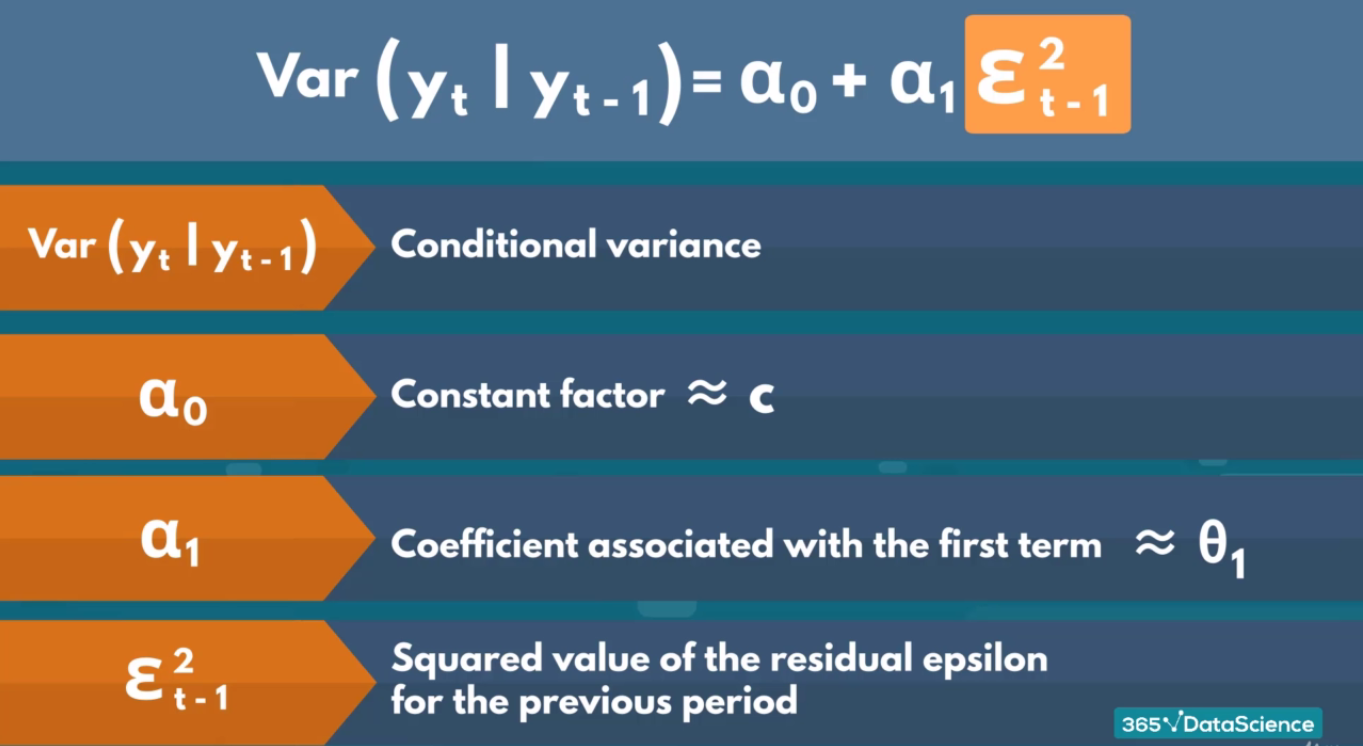

In [1]:
# ARCH(q): The number of previous values we include in the model

In [ ]:
# Volatility: Numeric measurement of uncertainity

In [ ]:
# we can express any variable, which we are tring to fit in ARCH model,
# r_t = mew_t + epsilon_t 

# epsilon_t = The residual values left after estimating the coefficients
# mew_t = a function of past values and past- 
# -errors(it is mean, a time-series, can be modelled with ARMAX model)

In [ ]:
# We assume mean is serially uncorrelated, (no time dependent pattern)

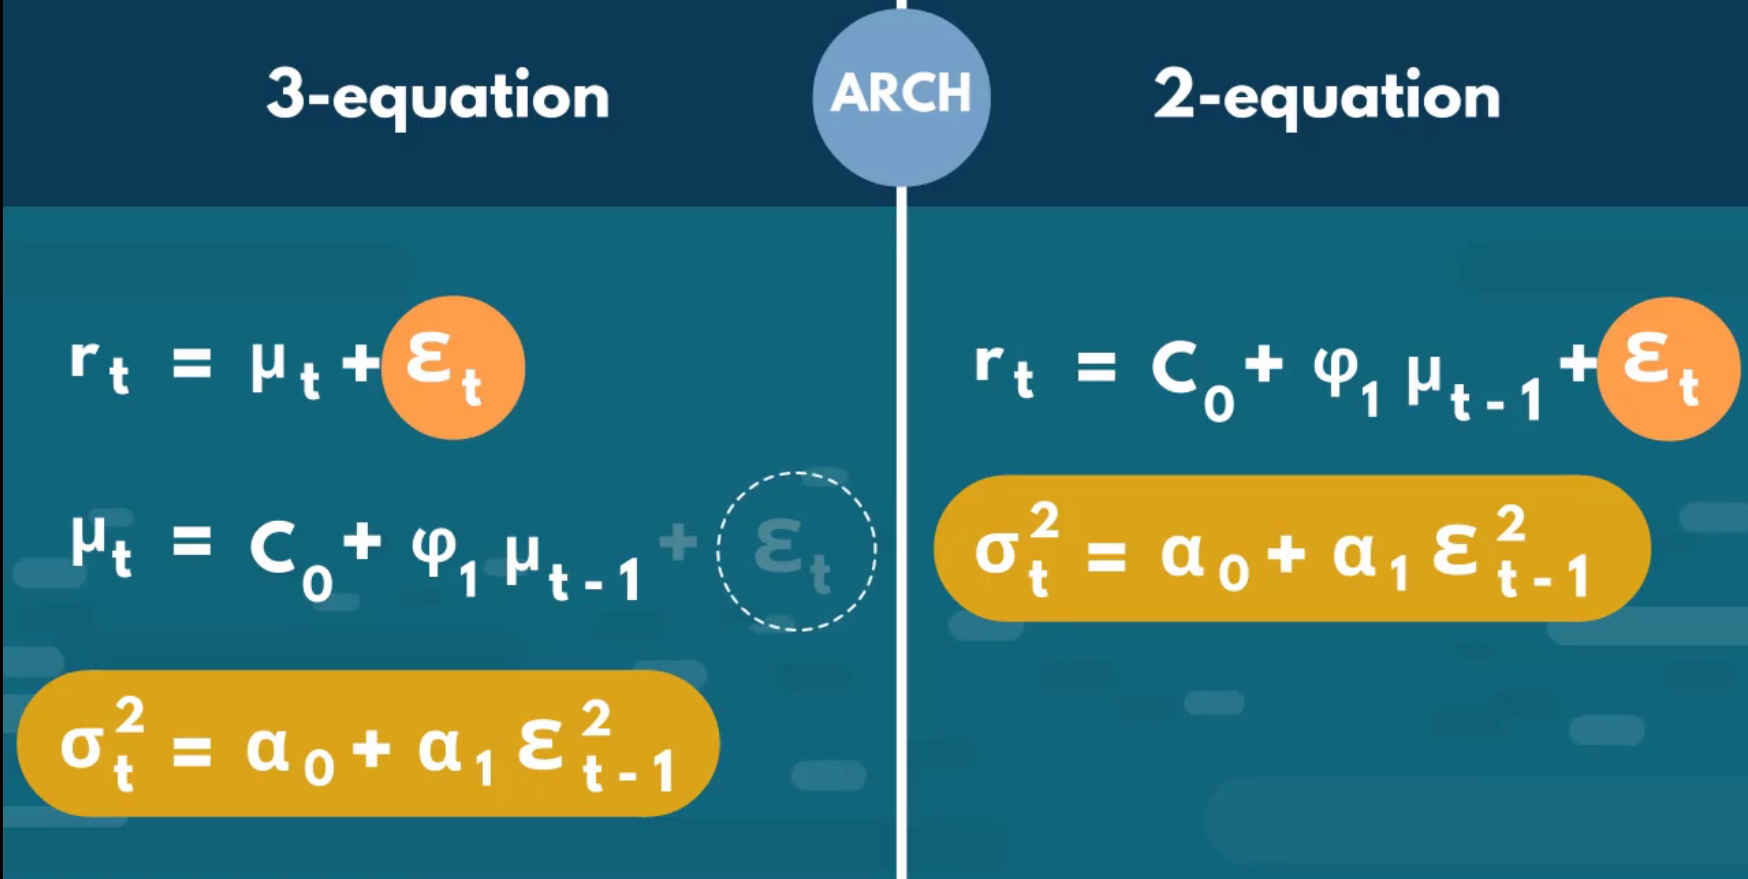

In [3]:
# The arch model first fit the mean equation to the data, and estimates
# the results, then using the residual values it measures the conditional
# variances.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA,ARIMA
import statsmodels.tsa.stattools as sts
from scipy.stats.distributions import chi2
import seaborn as sns
sns.set()

In [4]:
raw_csv_data = pd.read_csv("013 IndexE8.csv")
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date,dayfirst=True)
df_comp.set_index("date",inplace=True)
df_comp = df_comp.asfreq("b")
df_comp = df_comp.fillna(method="ffill")

In [5]:
df_comp['market_value'] = df_comp.ftse

In [6]:
# del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [9]:
pd.options.mode.chained_assignment = None

In [10]:
df["returns"] = df.market_value.pct_change(1).mul(100)
df.head()

,spx,market_value,returns,sq_returns
date,,,,
1994-01-07,469.90,3445.98,NaN,NaN
1994-01-10,475.27,3440.58,-0.156704,0.024556
1994-01-11,474.13,3413.77,-0.779229,0.607198
1994-01-12,474.17,3372.02,-1.222988,1.495700
1994-01-13,472.47,3360.01,-0.356166,0.126854


In [11]:
df['sq_returns'] = df.returns.mul(df.returns)

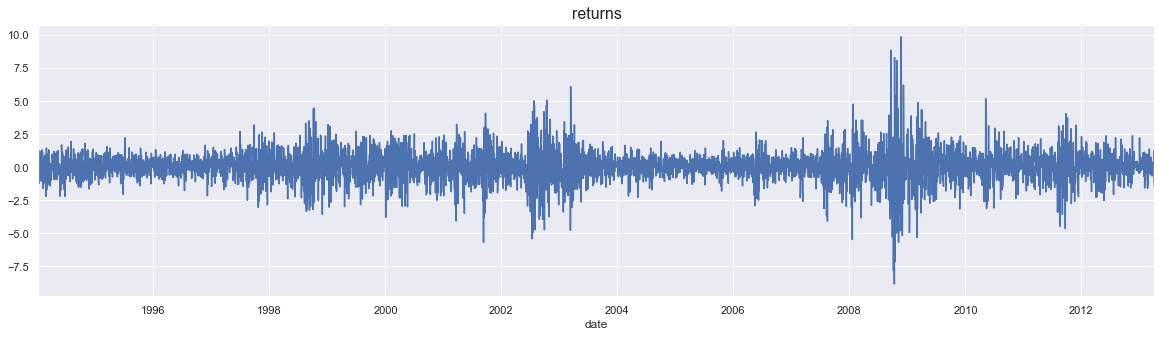

In [12]:
df.returns.plot(figsize=(20,5))
plt.title("returns",size=16)
plt.show()

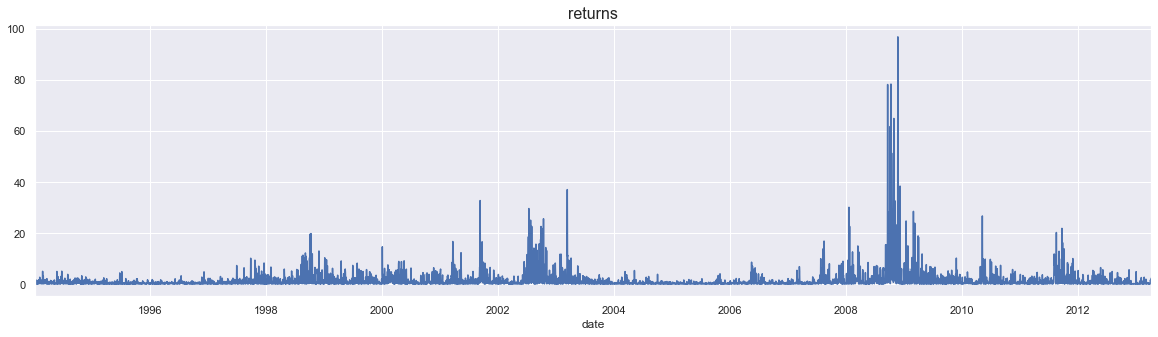

In [13]:
df.sq_returns.plot(figsize=(20,5))
plt.title("returns",size=16)
plt.show()

In [14]:
# We can use PACF for ARCH models

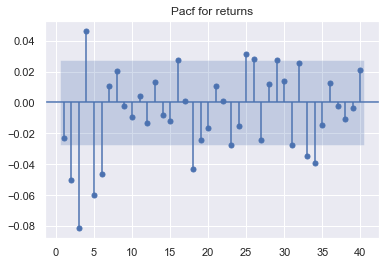

In [15]:
sgt.plot_pacf(df.returns[1:], lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title("Pacf for returns")
plt.show()

In [ ]:
# time series resembles white noise, squared version suggests using an
# AR(n)
# ARCH(N) to model variance

In [ ]:
# However we can't use the rule of thumb about significant lags,
# we should have a look at the squared values to get an idea about
# which lags are significant

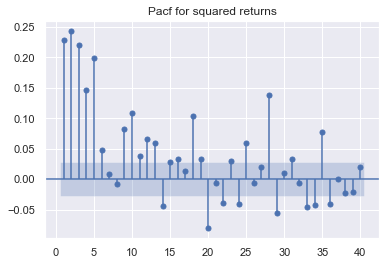

In [16]:
sgt.plot_pacf(df.sq_returns[1:], lags=40, alpha=0.05, zero=False, method=('ols'))
plt.title("Pacf for squared returns")
plt.show()

In [ ]:
# There are six significant lags, they suggest there tend to be short-term
# trends in variance

In [17]:
from arch import arch_model

In [20]:
model_arch_1 = arch_model(df.returns[1:])
results_arch_1 = model_arch_1.fit()
results_arch_1.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 6987.996939333616
Iteration:      2,   Func. Count:     16,   Neg. LLF: 6984.811181080089
Iteration:      3,   Func. Count:     25,   Neg. LLF: 6982.851338369392
Iteration:      4,   Func. Count:     32,   Neg. LLF: 6974.872841449069
Iteration:      5,   Func. Count:     39,   Neg. LLF: 6972.734752397977
Iteration:      6,   Func. Count:     46,   Neg. LLF: 6971.647379203453
Iteration:      7,   Func. Count:     53,   Neg. LLF: 6970.75580908556
Iteration:      8,   Func. Count:     60,   Neg. LLF: 6970.289548164581
Iteration:      9,   Func. Count:     67,   Neg. LLF: 6970.132427220125
Iteration:     10,   Func. Count:     73,   Neg. LLF: 6970.088043671654
Iteration:     11,   Func. Count:     79,   Neg. LLF: 6970.05847844171
Iteration:     12,   Func. Count:     85,   Neg. LLF: 6970.058367485935
Iteration:     13,   Func. Count:     91,   Neg. LLF: 6970.0583661891615
Optimization terminated successfully.    (Exit mode 0)
          

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Tue, Apr 06 2021   Df Residuals:                     5019
Time:                        21:56:21   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

In [21]:
# This model shows mean is time invariant, and is not serially correlated
# neither past values nor past residuals
# So, in that case!

In [27]:
model_arch_1 = arch_model(df.returns[1:],mean="Constant",vol="ARCH",p=1)
results_arch_1 = model_arch_1.fit(update_freq=5)
results_arch_1.summary()

Iteration:      5,   Func. Count:     34,   Neg. LLF: 7660.088789376147
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7660.08878204096
            Iterations: 6
            Function evaluations: 39
            Gradient evaluations: 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7660.09
Distribution:                  Normal   AIC:                           15326.2
Method:            Maximum Likelihood   BIC:                           15345.7
                                        No. Observations:                 5020
Date:                Tue, Apr 06 2021   Df Residuals:                     5019
Time:                        22:44:18   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0345  1.603e-02      2.151  3.147e-02 [3.063e-03,6.590e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.9206  4.309e-02     21.365 2.855e-101 [  0.836,  1.005]
alpha[1]       0.3684  5.040e-02      7.310  2.673e-13 [  0.270,  0.467]
========================================================================

Covariance estimator: robust
"""

In [ ]:
# previously arma(5,1) log-liklihood= -7889.311
# arima(5,1,1) ll = -27586.512 
# arch ll = -7660.09

# Even the simplest ARCH model yeilds a better estimate than the complex
# multi-lag ARIMA models

In [ ]:
# In the mean model the p-value is significant, hence mew coeff is the 
# baseline we use for residuals in the variance equation

In [ ]:
# in volatility model both the coeffs are significant

In [ ]:
# arch can only be used to predict future 
# variance rather than future returns

In [ ]:
# Higher lag arch models

In [26]:
model_arch_2 = arch_model(df.returns[1:],mean="Constant",vol="ARCH",p=2)
results_arch_2 = model_arch_2.fit(update_freq=5)
results_arch_2.summary()

Iteration:      5,   Func. Count:     41,   Neg. LLF: 7449.870533644225
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7449.545164098214
            Iterations: 9
            Function evaluations: 67
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7449.55
Distribution:                  Normal   AIC:                           14907.1
Method:            Maximum Likelihood   BIC:                           14933.2
                                        No. Observations:                 5020
Date:                Tue, Apr 06 2021   Df Residuals:                     5019
Time:                        22:44:14   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0484  1.401e-02      3.455  5.495e-04 [2.095e-02,7.585e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.6978  3.564e-02     19.580  2.272e-85 [  0.628,  0.768]
alpha[1]       0.2202  3.474e-02      6.339  2.311e-10 [  0.152,  0.288]
alpha[2]       0.2783  3.645e-02      7.635  2.260e-14 [  0.207,  0.350]
========================================================================

Covariance estimator: robust
"""

In [28]:
model_arch_3 = arch_model(df.returns[1:],mean="Constant",vol="ARCH",p=3)
results_arch_3 = model_arch_3.fit(update_freq=5)
results_arch_3.summary()

Iteration:      5,   Func. Count:     45,   Neg. LLF: 7278.805807411393
Iteration:     10,   Func. Count:     84,   Neg. LLF: 7277.050453152619
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7277.050452148393
            Iterations: 11
            Function evaluations: 91
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -7277.05
Distribution:                  Normal   AIC:                           14564.1
Method:            Maximum Likelihood   BIC:                           14596.7
                                        No. Observations:                 5020
Date:                Tue, Apr 06 2021   Df Residuals:                     5019
Time:                        22:45:30   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0529  1.316e-02      4.018  5.875e-05 [2.707e-02,7.865e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.5012  2.834e-02     17.685  5.505e-70 [  0.446,  0.557]
alpha[1]       0.1570  2.649e-02      5.926  3.108e-09 [  0.105,  0.209]
alpha[2]       0.2197  2.588e-02      8.489  2.077e-17 [  0.169,  0.270]
alpha[3]       0.2804  3.354e-02      8.359  6.302e-17 [  0.215,  0.346]
========================================================================

Covariance estimator: robust
"""

In [ ]:
# keep going untill 13
# including more and more values reduces the additional effects each one 
# has on the log-liklihood

# diminishing marginal log-likelihood

# the more past squared residuals we take into account, the less
# important each additional one becomes, analogically like ma models

## GARCH

In [ ]:
# Generalized ARCH

In [ ]:
# volatility model = variance model

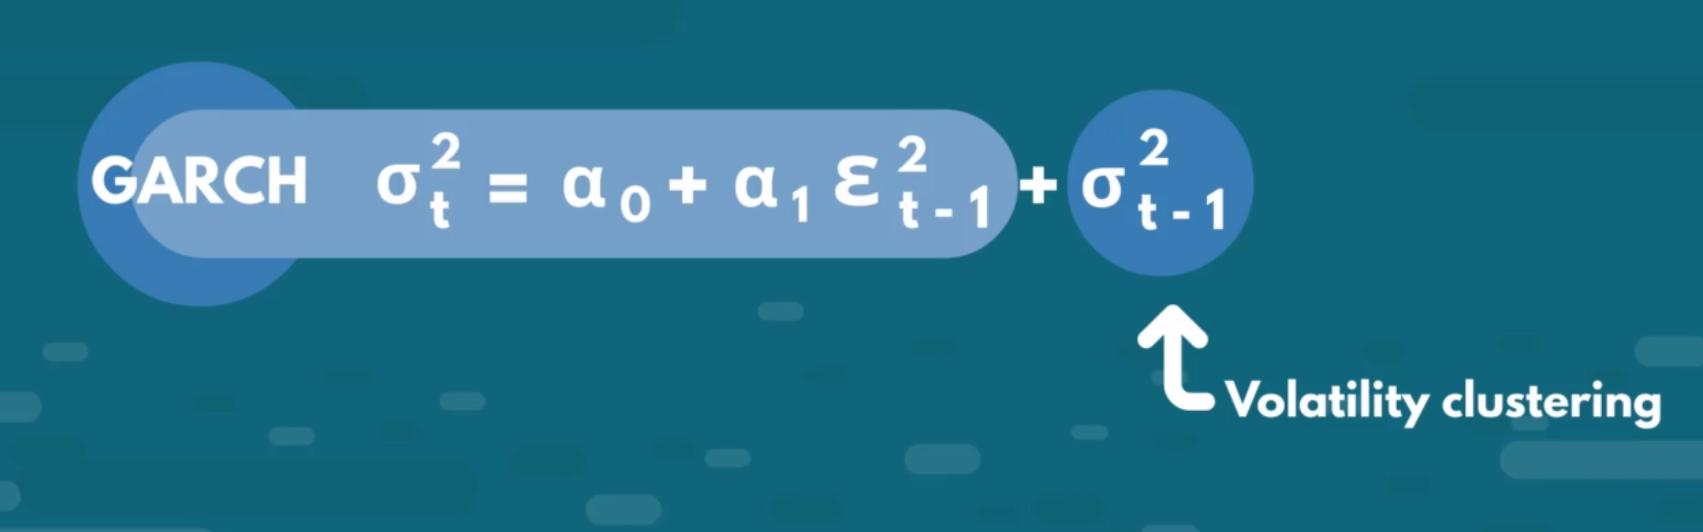

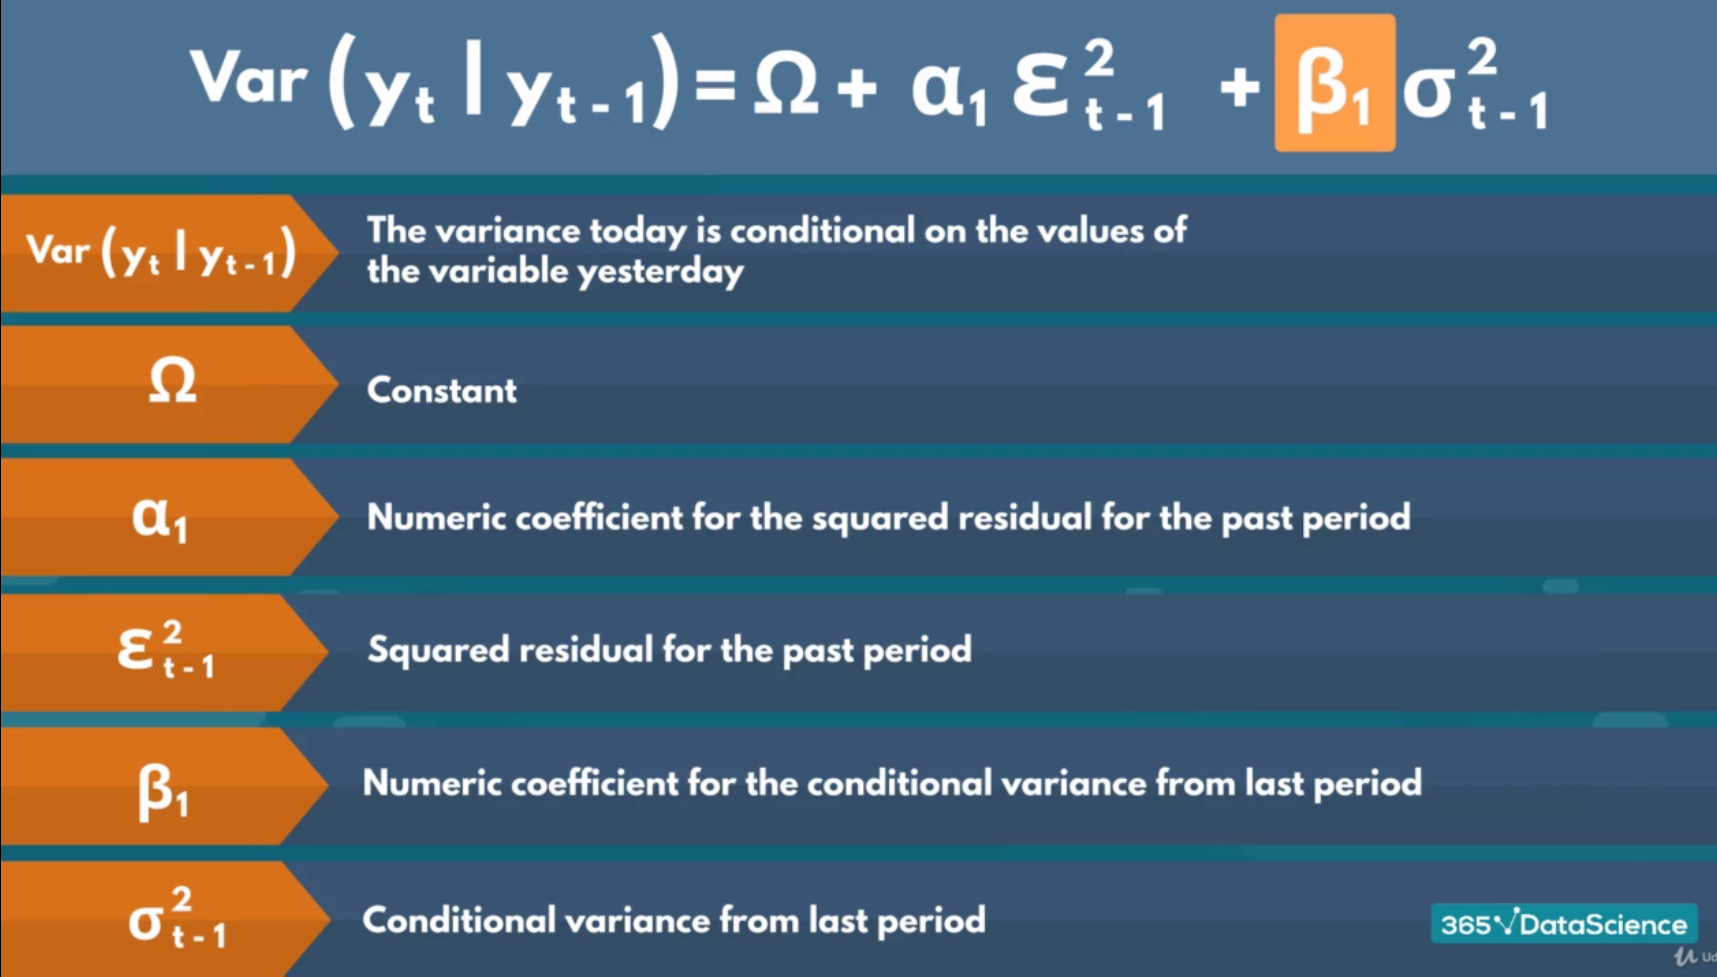

In [ ]:
# Similarity b/w Garch and Arma

# The GARCH has two orders, 
# a. arch order : (no. of past squared residuals)
# b. GARCH order : (no. of past conditional variances)

# similarily the ARMA model has two orders, one for past values, and 
# one for past residuals


In [ ]:
# Fitting a GARCH(1,1) model with serially uncorrelated data

# The mean model doesn't rely on past values or errors
# means constant mean model

In [31]:
model_garch_1_1 = arch_model(df.returns[1:],mean="Constant",
                             vol="Garch",p=1,q=1)
results_garch_1_1 = model_garch_1_1.fit(update_freq=5)
results_garch_1_1.summary()

Iteration:      5,   Func. Count:     39,   Neg. LLF: 6972.734752397977
Iteration:     10,   Func. Count:     73,   Neg. LLF: 6970.088043671654
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6970.058366189876
            Iterations: 13
            Function evaluations: 91
            Gradient evaluations: 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13948.1
Method:            Maximum Likelihood   BIC:                           13974.2
                                        No. Observations:                 5020
Date:                Tue, Apr 06 2021   Df Residuals:                     5019
Time:                        23:32:52   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.183e-02      3.939  8.187e-05 [2.342e-02,6.981e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  3.004e-03      3.640  2.724e-04 [5.048e-03,1.682e-02]
alpha[1]       0.0835  1.071e-02      7.794  6.476e-15   [6.249e-02,  0.104]
beta[1]        0.9089  1.148e-02     79.168      0.000     [  0.886,  0.931]
============================================================================

Covariance estimator: robust
"""

In [ ]:
# "No higher-order GARCH models outperform the GARCH(1,1) when
# it comes to variance of market returns"

# all the effects of the conditional variance 2 days ago will be 
# contained in the conditional variance of yesterday
# No need to include more than 1 garch component

In [ ]:
# Higher lag models, the notation p and q are flipped

In [32]:
model_garch_1_2 = arch_model(df.returns[1:],mean="Constant",
                             vol="Garch",p=1,q=2)
results_garch_1_2 = model_garch_1_2.fit(update_freq=5)
results_garch_1_2.summary()

Iteration:      5,   Func. Count:     44,   Neg. LLF: 6978.593988486672
Iteration:     10,   Func. Count:     80,   Neg. LLF: 6970.063553697997
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6970.058366227228
            Iterations: 12
            Function evaluations: 95
            Gradient evaluations: 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6970.06
Distribution:                  Normal   AIC:                           13950.1
Method:            Maximum Likelihood   BIC:                           13982.7
                                        No. Observations:                 5020
Date:                Tue, Apr 06 2021   Df Residuals:                     5019
Time:                        23:39:48   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0466  1.184e-02      3.938  8.219e-05 [2.341e-02,6.982e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0109  2.908e-03      3.761  1.696e-04 [5.236e-03,1.663e-02]
alpha[1]       0.0835  1.189e-02      7.019  2.231e-12   [6.017e-02,  0.107]
beta[1]        0.9089      0.188      4.845  1.268e-06     [  0.541,  1.277]
beta[2]        0.0000      0.180      0.000      1.000     [ -0.352,  0.352]
============================================================================

Covariance estimator: robust
"""